In [26]:
%matplotlib inline

import sys
import datetime
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

In [27]:
np.random.seed(16) # include a seed for reproducibility

# generate the normal data
normal_mean = np.array([1.0, 2.0]) 
normal_covariance = np.array([[0.2, 0.0], [0.0, 0.1]])
normal_data = np.random.multivariate_normal(normal_mean, normal_covariance, 100)

# generate the anomalous data
anomaly_mean = np.array([6.0, 8.0]) 
anomaly_covariance = np.array([[2.0, 0.0], [0.0, 4.0]])
anomaly_data = np.random.multivariate_normal(anomaly_mean, anomaly_covariance, 10)



# The 'normal' in np.random.multivariate_normal refers to a Gaussian distribution
# and is not related to normal vs. anomaly



all_data = np.concatenate((normal_data, anomaly_data), axis=0)

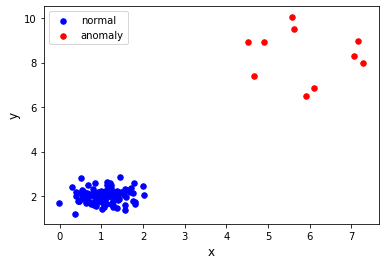

In [28]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.scatter(normal_data[:,0], normal_data[:,1], s=30, c='b', marker="o", label='normal')
ax1.scatter(anomaly_data[:,0], anomaly_data[:,1], s=30, c='r', marker="o", label='anomaly')
plt.legend(loc='upper left');
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [29]:
# Given points A, B and C, this function returns the acute angle between vectors AB and AC
# using the dot product between these vectors

def angle(point1, point2, point3): 
    v21 = np.subtract(point2, point1)
    v31 = np.subtract(point3, point1)
    dot_product = (v21*v31).sum()
    normalization = np.linalg.norm(v21)*np.linalg.norm(v31)
    acute_angle = np.arccos(dot_product/normalization)
    return acute_angle

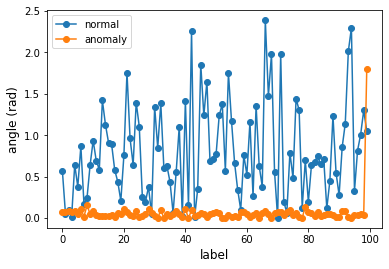

In [30]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)
np.random.seed(17)
normal_point = random.choice(normal_data)
anomaly_point = random.choice(anomaly_data)
normal_angles = eval_angle_point(normal_point, all_data)
anomaly_angles = eval_angle_point(anomaly_point, all_data)
ax2.plot(normal_angles[0:100],  marker="o", label='normal')
ax2.plot(anomaly_angles[0:100], marker="o", label='anomaly')
plt.xlabel('label', fontsize=12)
plt.ylabel('angle (rad)', fontsize=12)
plt.legend(loc='best')
plt.savefig('angle_based.png', dpi=600) # for use in the lecture
plt.show()

In [31]:
print('The normal point is {}'.format(normal_point))
print('The variance in angle for the normal point is {:.5f}'.format(np.var(normal_angles)))
print('The anomaly point is {}'.format(anomaly_point))
print('The variance in angle for the anomaly point is {:.5f}'.format(np.var(anomaly_angles)))

The normal point is [1.05722041 1.51665425]
The variance in angle for the normal point is 0.44243
The anomaly point is [7.26987961 7.96618383]
The variance in angle for the anomaly point is 0.23593


In [32]:
import time
start = time.time()

df_anomaly = pd.DataFrame(columns=['point','angle variance','type'])
for index, item in enumerate(anomaly_data):
    df_anomaly.loc[index] = [item, np.var(eval_angle_point(item, all_data)), 0]
    
end = time.time()
print("Time taken to calculate the angle variance for anomaly data " + str(end - start))

Time taken to calculate the angle variance for anomaly data 2.089508533477783


In [33]:
df_anomaly.head(10)

,point,angle variance,type
0,"[7.066571495854759, 8.281551528370615]",0.239963,0
1,"[4.912232977610025, 8.944978801062241]",0.447247,0
2,"[5.618891639278701, 9.532065047272486]",0.224829,0
3,"[7.1614373367580715, 8.987418490481454]",0.091516,0
4,"[4.674205174076478, 7.397706178223456]",0.767388,0
5,"[5.586324770476369, 10.062306048806747]",0.092226,0
6,"[7.269879610663201, 7.966183826740902]",0.235928,0
7,"[6.098404325738117, 6.8499254027187835]",0.615849,0
8,"[4.525878242454957, 8.9101902697607]",0.454711,0
9,"[5.91594235166447, 6.4859511951762014]",0.719209,0


In [34]:

start = time.time()

df_normal = pd.DataFrame(columns=['point','angle variance','type'])
for index2, item2 in enumerate(normal_data):
    df_normal.loc[index2] = [item2, np.var(eval_angle_point(item2, all_data)), 1]

end = time.time()
print("Time taken to calculate the angle variance for normal data " + str(end - start))

Time taken to calculate the angle variance for normal data 19.695696115493774


In [35]:
df_normal.head(10)

,point,angle variance,type
0,"[1.057220407617929, 1.5166542526994613]",0.442425,1
1,"[0.7341458372525282, 2.020975505908734]",0.810849,1
2,"[0.44746989551628713, 1.8035059930728545]",0.326829,1
3,"[0.6024504585701147, 2.157769149062043]",0.629593,1
4,"[0.648088917734629, 2.0375500118982566]",0.701444,1
5,"[0.6615205158568662, 2.1560163153875744]",0.706020,1
6,"[0.6246069790039117, 1.6790219066107057]",0.432611,1
7,"[0.8468205401506654, 2.5959198435039514]",0.580395,1
8,"[0.8788440637281327, 1.5409260367027504]",0.419533,1
9,"[0.5169382272892247, 2.811148431089265]",0.377435,1


In [36]:
df_all = df_anomaly.append(df_normal, ignore_index=True)
df_all.sort_values(by=['angle variance']).head(10)

,point,angle variance,type
43,"[-0.007963240085042012, 1.6819486434208086]",0.085313,1
25,"[0.3717420163194104, 1.213654699499786]",0.091273,1
3,"[7.1614373367580715, 8.987418490481454]",0.091516,0
5,"[5.586324770476369, 10.062306048806747]",0.092226,0
2,"[5.618891639278701, 9.532065047272486]",0.224829,0
6,"[7.269879610663201, 7.966183826740902]",0.235928,0
0,"[7.066571495854759, 8.281551528370615]",0.239963,0
78,"[1.5633761101073278, 1.3905898245810073]",0.258711,1
90,"[0.29736034146994617, 2.4299459590107038]",0.268153,1
105,"[1.004238386524476, 1.4325277933330982]",0.310493,1
